In [4]:
###fit the regression 
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
import math
from matplotlib import pyplot as plt
%matplotlib inline

filepath = "/Users/eshwarchandrasekharan/Desktop/repo/predict-pop/models-links/"

import pandas as pd

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
##given performance in the previous page, where should I post next?
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
import math

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn import linear_model
clf = linear_model.LinearRegression()
print("LINEAR REGRESSION!")

# from sklearn.tree import DecisionTreeRegressor
# clf = DecisionTreeRegressor(max_depth=10)
# print("TREE REGRESSION!")

# from sklearn.ensemble import AdaBoostClassifier
# clf =  AdaBoostClassifier()
# print("ADABOOST!")

# log_scaling = 0
log_scaling = 1

if log_scaling == 1:
    print("LOG SCALED!")
else:
    print("RAW COUNTS!")
# train_df = pd.read_csv(filepath + 'jan-jun-2017-videos-post-type-2-16.csv')
train_df = pd.read_csv(filepath + 'radshift_links_cross_posting_info.csv')
train_df = train_df.fillna(0)

# video_df.shape, video_df['external_id'].unique().shape
train_df = train_df.sort_values('stats_date', ascending = False).drop_duplicates(subset=['external_id'], keep = 'last')

one_hour_features = [
                       'consumptions_by_type__link_clicks',
       'consumptions_by_type__other_clicks',
       'reactions_like_total',
       'stories_by_action_type__comment',
       'stories_by_action_type__like',
       'stories_by_action_type__share', 
        'engaged_fan',
       'fan_reach', 
    'impressions',
       'impressions_fan',
               ]

#        'twoday_consumptions_by_type__link_clicks',
#        'twoday_stories_by_action_type__share',


train_features = one_hour_features

if log_scaling == 1:
    for feats in (one_hour_features):
        train_df[feats] = np.log(train_df[feats] + 1)

# lm = linear_model.LinearRegression(fit_intercept=True, normalize=True)
cv = 10

# train_df['10s_bucket'] = np.log(train_df['twodays_video_views_10s_organic'] + 1).astype(int)
# train_df['30s_bucket'] = np.log(train_df['twodays_video_complete_views_30s_organic'] + 1).astype(int)
# train_df['complete_views_bucket'] = np.log(train_df['twodays_video_complete_views_organic'] + 1).astype(int)

print("No. of data-points = ", len(train_df))

if log_scaling == 1:
    y_share = np.log(1+train_df['twoday_stories_by_action_type__share']).astype(int)
    y_clicks = np.log(1+train_df['twoday_consumptions_by_type__link_clicks']).astype(int)
else:
    y_share = train_df['twoday_stories_by_action_type__share']
    y_clicks = train_df['twoday_consumptions_by_type__link_clicks']

# y_10s = train_df['twodays_video_views_10s_organic']
# y_30s = train_df['twodays_video_complete_views_30s_organic']
# y_complete = train_df['twodays_video_complete_views_organic']
###
# y_10s = train_df['10s_bucket']
# y_30s = train_df['30s_bucket']
# y_complete = train_df['complete_views_bucket']

###generate DFs for analysis - X and Y
X = train_df[train_features]

from sklearn.model_selection import KFold

fold = 0
cv_folds = 10
kf = KFold(n_splits = cv_folds, shuffle = True)

accuracy_10s = []
error_10s = []
accuracy_30s = []
error_30s = []
accuracy_complete = []
error_complete = []

share_cv_y_test = []
share_cv_y_pred = []
clicks_cv_y_test = []
clicks_cv_y_pred = []

for train_index, test_index in kf.split(X):
    print("Fold = ", fold)
#     print("Shares: Fold = ", fold)
    y = y_share
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    ####
    for pt in y_test:
        share_cv_y_test.append(pt)
    for pt in y_pred:
        share_cv_y_pred.append(pt)
#     share_cv_y_test = share_cv_y_test +  y_test
#     share_cv_y_pred = share_cv_y_pred + y_pred
    ####
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    accuracy_10s.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    error_10s.append(error_percent)
    
#     print("Clicks: Fold = ", fold)
    y = y_clicks
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    ####
    for pt in y_test:
        clicks_cv_y_test.append(pt)
    for pt in y_pred:
        clicks_cv_y_pred.append(pt)

#     clicks_cv_y_test = clicks_cv_y_test +  y_test
#     clicks_cv_y_pred = clicks_cv_y_pred + y_pred
    ####
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    accuracy_30s.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    error_30s.append(error_percent)
    
    fold += 1
    
print("Share performance: Accuracy = ", np.mean(accuracy_10s), " ; Error (/100) = ", np.mean(error_10s))
print("Clicks performance: Accuracy = ", np.mean(accuracy_30s), " ; Error (/100) = ", np.mean(error_30s))

LINEAR REGRESSION!
LOG SCALED!
No. of data-points =  85591
Fold =  0
Fold =  1
Fold =  2
Fold =  3
Fold =  4
Fold =  5
Fold =  6
Fold =  7
Fold =  8
Fold =  9
Share performance: Accuracy =  0.884665297611  ; Error (/100) =  0.115730321736
Clicks performance: Accuracy =  0.918372228088  ; Error (/100) =  0.0439799594779


R2:  0.884683333878
Error (\100):  0.115730323489
Mean:  4.01411363344
R2:  -154274.520828
Error (\100):  4.62303516521
Mean:  266.364039316


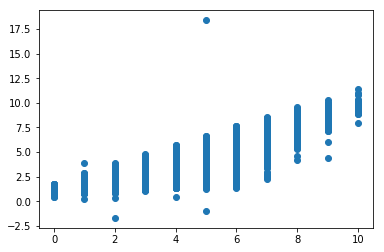

In [32]:
##share
# share_cv_y_test
# share_cv_y_pred

accuracy = metrics.r2_score(share_cv_y_test, share_cv_y_pred)
print("R2: ", accuracy)
error_percent = mean_absolute_error(share_cv_y_test, share_cv_y_pred)/np.mean(share_cv_y_test)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(share_cv_y_test))
########
accuracy = metrics.r2_score(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)
print("R2: ", accuracy)
error_percent = mean_absolute_error(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)/np.mean(np.exp(share_cv_y_test)-1)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(np.exp(share_cv_y_test)-1))

plt.scatter(share_cv_y_test, share_cv_y_pred)

In [28]:
##given performance in the previous page, where should I post next?
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
import math

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn import linear_model
clf = linear_model.LinearRegression()
print("LINEAR REGRESSION!")

# from sklearn.tree import DecisionTreeRegressor
# clf = DecisionTreeRegressor(max_depth=10)
# print("TREE REGRESSION!")

# from sklearn.ensemble import AdaBoostClassifier
# clf =  AdaBoostClassifier()
# print("ADABOOST!")

log_scaling = 0
# log_scaling = 1

if log_scaling == 1:
    print("LOG SCALED!")
else:
    print("RAW COUNTS!")
# train_df = pd.read_csv(filepath + 'jan-jun-2017-videos-post-type-2-16.csv')
train_df = pd.read_csv(filepath + 'radshift_links_cross_posting_info.csv')
train_df = train_df.fillna(0)

# video_df.shape, video_df['external_id'].unique().shape
train_df = train_df.sort_values('stats_date', ascending = False).drop_duplicates(subset=['external_id'], keep = 'last')

one_hour_features = [
                       'consumptions_by_type__link_clicks',
       'consumptions_by_type__other_clicks',
       'reactions_like_total',
       'stories_by_action_type__comment',
       'stories_by_action_type__like',
       'stories_by_action_type__share', 
        'engaged_fan',
       'fan_reach', 
    'impressions',
       'impressions_fan',
               ]

#        'twoday_consumptions_by_type__link_clicks',
#        'twoday_stories_by_action_type__share',


train_features = one_hour_features

all_pages = train_df['page'].unique()

for pg in all_pages:
    train_features.append(pg)

alt_inf = len(all_pages) + 1
train_df = train_df.replace(math.inf, alt_inf)

if log_scaling == 1:
    for feats in (one_hour_features):
        train_df[feats] = np.log(train_df[feats] + 1)

# lm = linear_model.LinearRegression(fit_intercept=True, normalize=True)
cv = 10

# train_df['10s_bucket'] = np.log(train_df['twodays_video_views_10s_organic'] + 1).astype(int)
# train_df['30s_bucket'] = np.log(train_df['twodays_video_complete_views_30s_organic'] + 1).astype(int)
# train_df['complete_views_bucket'] = np.log(train_df['twodays_video_complete_views_organic'] + 1).astype(int)

print("No. of data-points = ", len(train_df))

if log_scaling == 1:
    y_share = np.log(1+train_df['twoday_stories_by_action_type__share']).astype(int)
    y_clicks = np.log(1+train_df['twoday_consumptions_by_type__link_clicks']).astype(int)
else:
    y_share = train_df['twoday_stories_by_action_type__share']
    y_clicks = train_df['twoday_consumptions_by_type__link_clicks']

# y_10s = train_df['twodays_video_views_10s_organic']
# y_30s = train_df['twodays_video_complete_views_30s_organic']
# y_complete = train_df['twodays_video_complete_views_organic']
###
# y_10s = train_df['10s_bucket']
# y_30s = train_df['30s_bucket']
# y_complete = train_df['complete_views_bucket']

###generate DFs for analysis - X and Y
X = train_df[train_features]

from sklearn.model_selection import KFold

fold = 0
cv_folds = 10
kf = KFold(n_splits = cv_folds, shuffle = True)

accuracy_10s = []
error_10s = []
accuracy_30s = []
error_30s = []
accuracy_complete = []
error_complete = []

for train_index, test_index in kf.split(X):
#     print("Fold = ", fold)
#     print("Shares: Fold = ", fold)
    y = y_share
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
        
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    accuracy_10s.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    error_10s.append(error_percent)
    
#     print("Clicks: Fold = ", fold)
    y = y_clicks
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    accuracy_30s.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    error_30s.append(error_percent)
    
    fold += 1
    
print("Share performance: Accuracy = ", np.mean(accuracy_10s), " ; Error (/100) = ", np.mean(error_10s))
print("Clicks performance: Accuracy = ", np.mean(accuracy_30s), " ; Error (/100) = ", np.mean(error_30s))

LINEAR REGRESSION!
RAW COUNTS!
No. of data-points =  85591
Share performance: Accuracy =  0.81481668442  ; Error (/100) =  0.405537942289
Clicks performance: Accuracy =  0.908575655615  ; Error (/100) =  0.2545773374
